In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('data_cleaned.csv')

In [3]:
data.head()

,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,total_orders,w1_total_orders,w2_total_orders,w3_total_orders,...,send2update_time_max,intime_rate,last_coupon_fee,last_send_type,order_nums,city_id,sex,age,login_platform_b,app_version_b
0,0.663138,10,3.0,4.888889,1.0,12.0,16.0,4.0,2.0,2.0,...,2751.0,0.937500,9.0,1,8.0,0,1,80.0,0,1
1,0.602960,18,7.0,2.941176,1.0,11.0,22.0,8.0,5.0,3.0,...,8206.0,1.000000,7.0,1,10.0,0,0,-1.0,1,1
2,0.391684,13,5.0,4.500000,2.0,12.0,13.0,3.0,2.0,2.0,...,3524.0,1.000000,10.0,1,7.0,0,0,-1.0,1,0
3,0.337142,9,5.0,8.625000,1.0,53.0,9.0,2.0,0.0,0.0,...,4031.0,1.000000,0.0,1,5.0,0,0,-1.0,1,1
4,0.535490,12,5.0,3.454545,1.0,6.0,15.0,0.0,0.0,0.0,...,3324.0,0.933333,0.0,1,2.0,0,2,90.0,0,1


In [4]:
data.isnull().any()

order_sd                   False
active_days                False
lastgap                    False
avg_gap                    False
min_gap                    False
max_gap                    False
total_orders               False
w1_total_orders            False
w2_total_orders            False
w3_total_orders            False
w4_total_orders            False
w5_total_orders            False
w6_total_orders            False
w7_total_orders            False
total_couponworth          False
w1_total_couponworth       False
w2_total_couponworth       False
w3_total_couponworth       False
w4_total_couponworth       False
w5_total_couponworth       False
w6_total_couponworth       False
w7_total_couponworth       False
label                      False
first_order                False
last_order                 False
accountLength              False
overall_time_mean          False
update2create_time_mean    False
send2update_time_mean      False
overall_time_min           False
update2cre

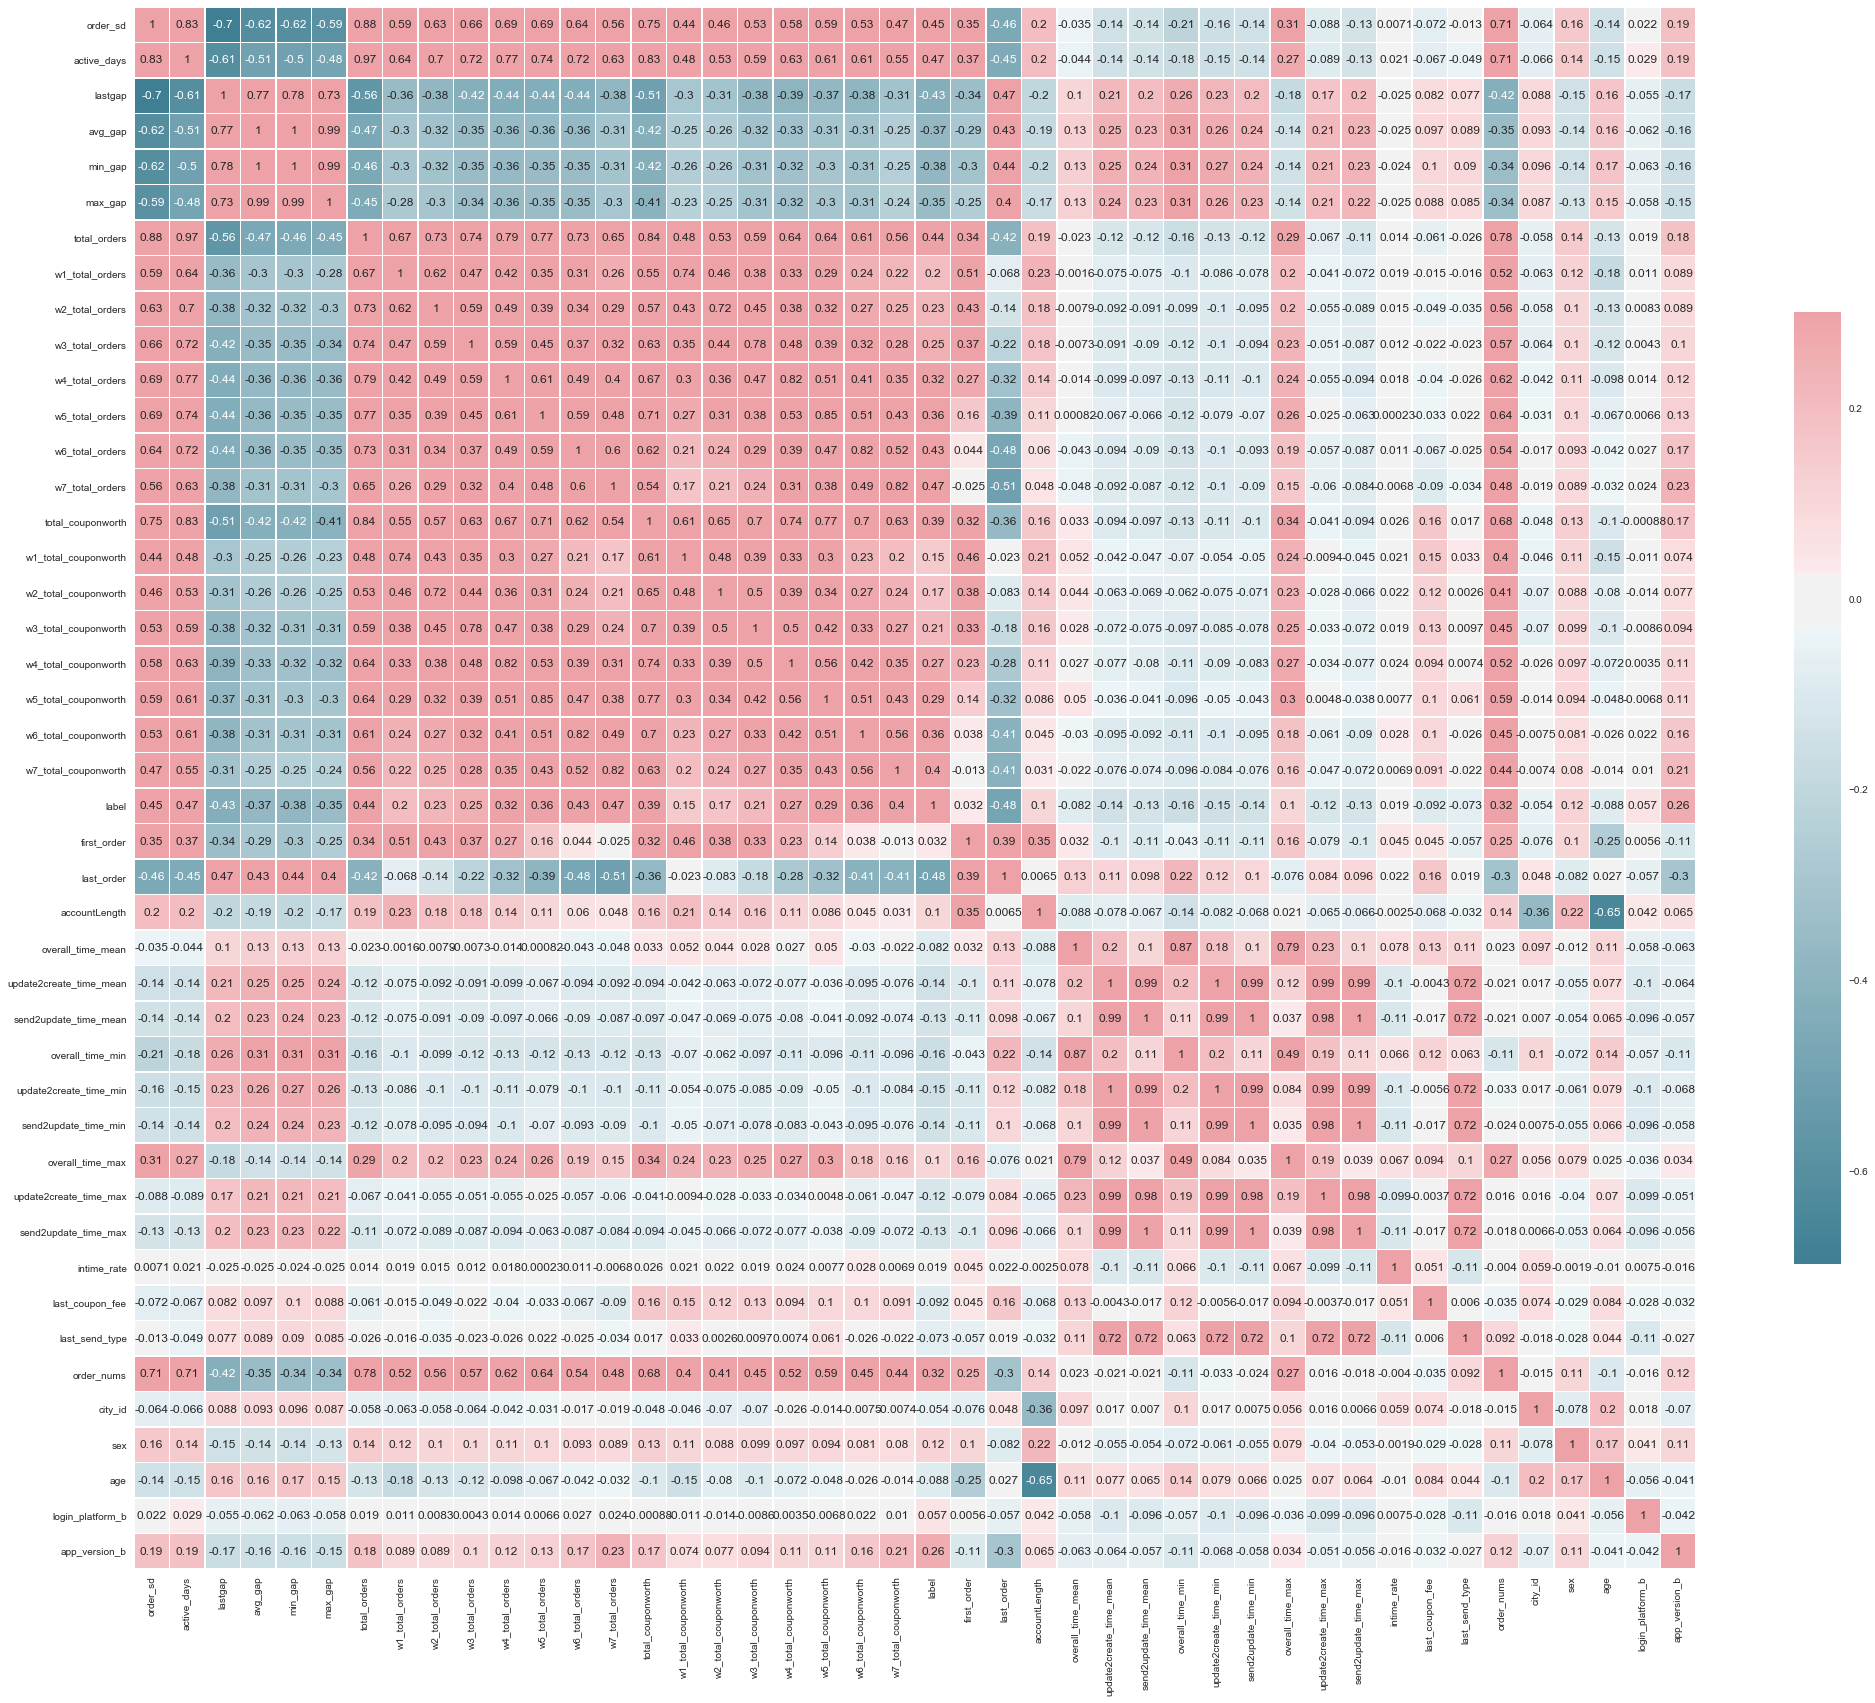

In [92]:
from string import ascii_letters
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white")


d = data

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(35, 35))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plot=sns.heatmap(corr, cmap=cmap,annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).get_figure()

plot.savefig("correlation_v2.png")

In [5]:
cor=data.corr()
cor['label']=cor['label'].abs()
cor.sort_values(by=['label'],ascending=False)['label']

label                      1.000000
last_order                 0.484395
w7_total_orders            0.472906
active_days                0.472200
order_sd                   0.454651
total_orders               0.442837
w6_total_orders            0.426450
lastgap                    0.425200
w7_total_couponworth       0.399555
total_couponworth          0.386192
min_gap                    0.375338
avg_gap                    0.373280
w6_total_couponworth       0.364698
w5_total_orders            0.359762
max_gap                    0.352806
order_nums                 0.321293
w4_total_orders            0.317597
w5_total_couponworth       0.294833
w4_total_couponworth       0.266777
app_version_b              0.262176
w3_total_orders            0.253228
w2_total_orders            0.225523
w3_total_couponworth       0.210239
w1_total_orders            0.203746
w2_total_couponworth       0.168360
overall_time_min           0.159975
update2create_time_min     0.150303
w1_total_couponworth       0

In [94]:
cor.sort_values(by=['label'],ascending=False)['label'].index

Index(['label', 'last_order', 'w7_total_orders', 'active_days', 'order_sd',
       'total_orders', 'w6_total_orders', 'lastgap', 'w7_total_couponworth',
       'total_couponworth', 'min_gap', 'avg_gap', 'w6_total_couponworth',
       'w5_total_orders', 'max_gap', 'order_nums', 'w4_total_orders',
       'w5_total_couponworth', 'w4_total_couponworth', 'app_version_b',
       'w3_total_orders', 'w2_total_orders', 'w3_total_couponworth',
       'w1_total_orders', 'w2_total_couponworth', 'overall_time_min',
       'update2create_time_min', 'w1_total_couponworth',
       'update2create_time_mean', 'send2update_time_min',
       'send2update_time_mean', 'send2update_time_max', 'sex',
       'update2create_time_max', 'overall_time_max', 'accountLength',
       'last_coupon_fee', 'age', 'overall_time_mean', 'last_send_type',
       'login_platform_b', 'city_id', 'first_order', 'intime_rate'],
      dtype='object')

In [95]:
corrlist=['last_order', 'w7_total_orders', 'active_days', 'order_sd',
       'total_orders', 'w6_total_orders', 'lastgap', 'w7_total_couponworth',
       'total_couponworth', 'min_gap', 'avg_gap', 'w6_total_couponworth',
       'w5_total_orders', 'max_gap', 'order_nums', 'w4_total_orders',]

In [96]:
rflist=['last_order','w7_total_orders','w7_total_couponworth','active_days','total_orders','w6_total_orders','lastgap','order_sd','min_gap','avg_gap','order_nums','w6_total_couponworth','max_gap','total_couponworth','app_version_b','first_order']

In [97]:
len(rflist)

16

In [98]:
len(corrlist)

16

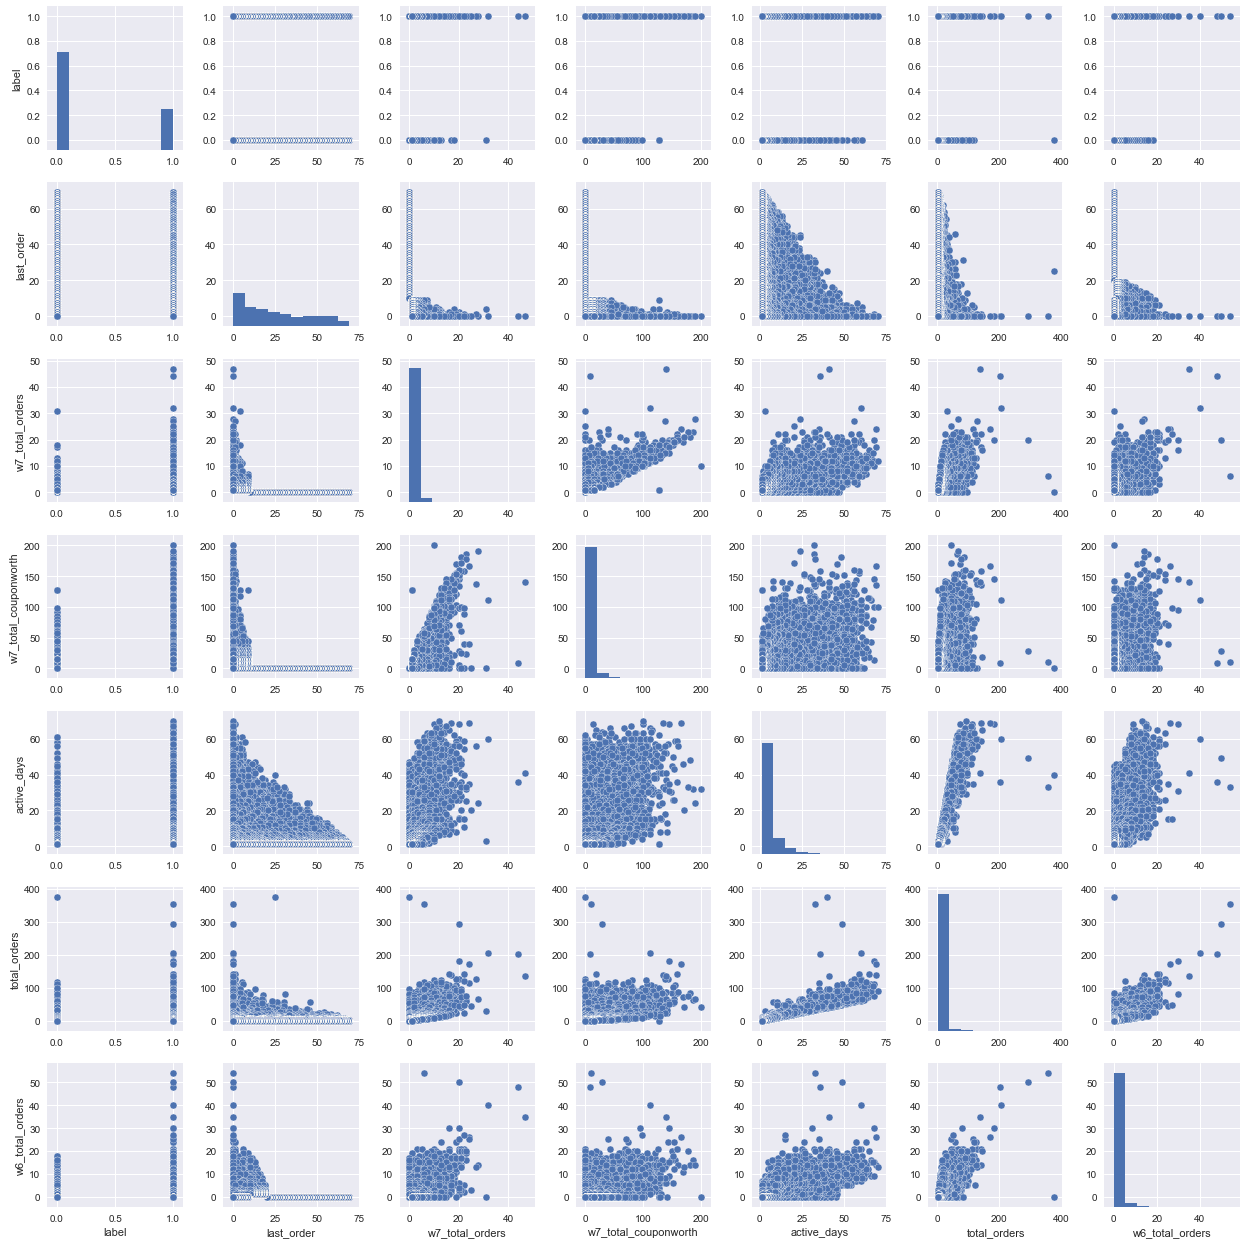

In [99]:
#scatterplot
sns.set()
cols = ['label','last_order','w7_total_orders','w7_total_couponworth','active_days','total_orders','w6_total_orders']
sns.pairplot(data[cols], size = 2.5)
plt.show();

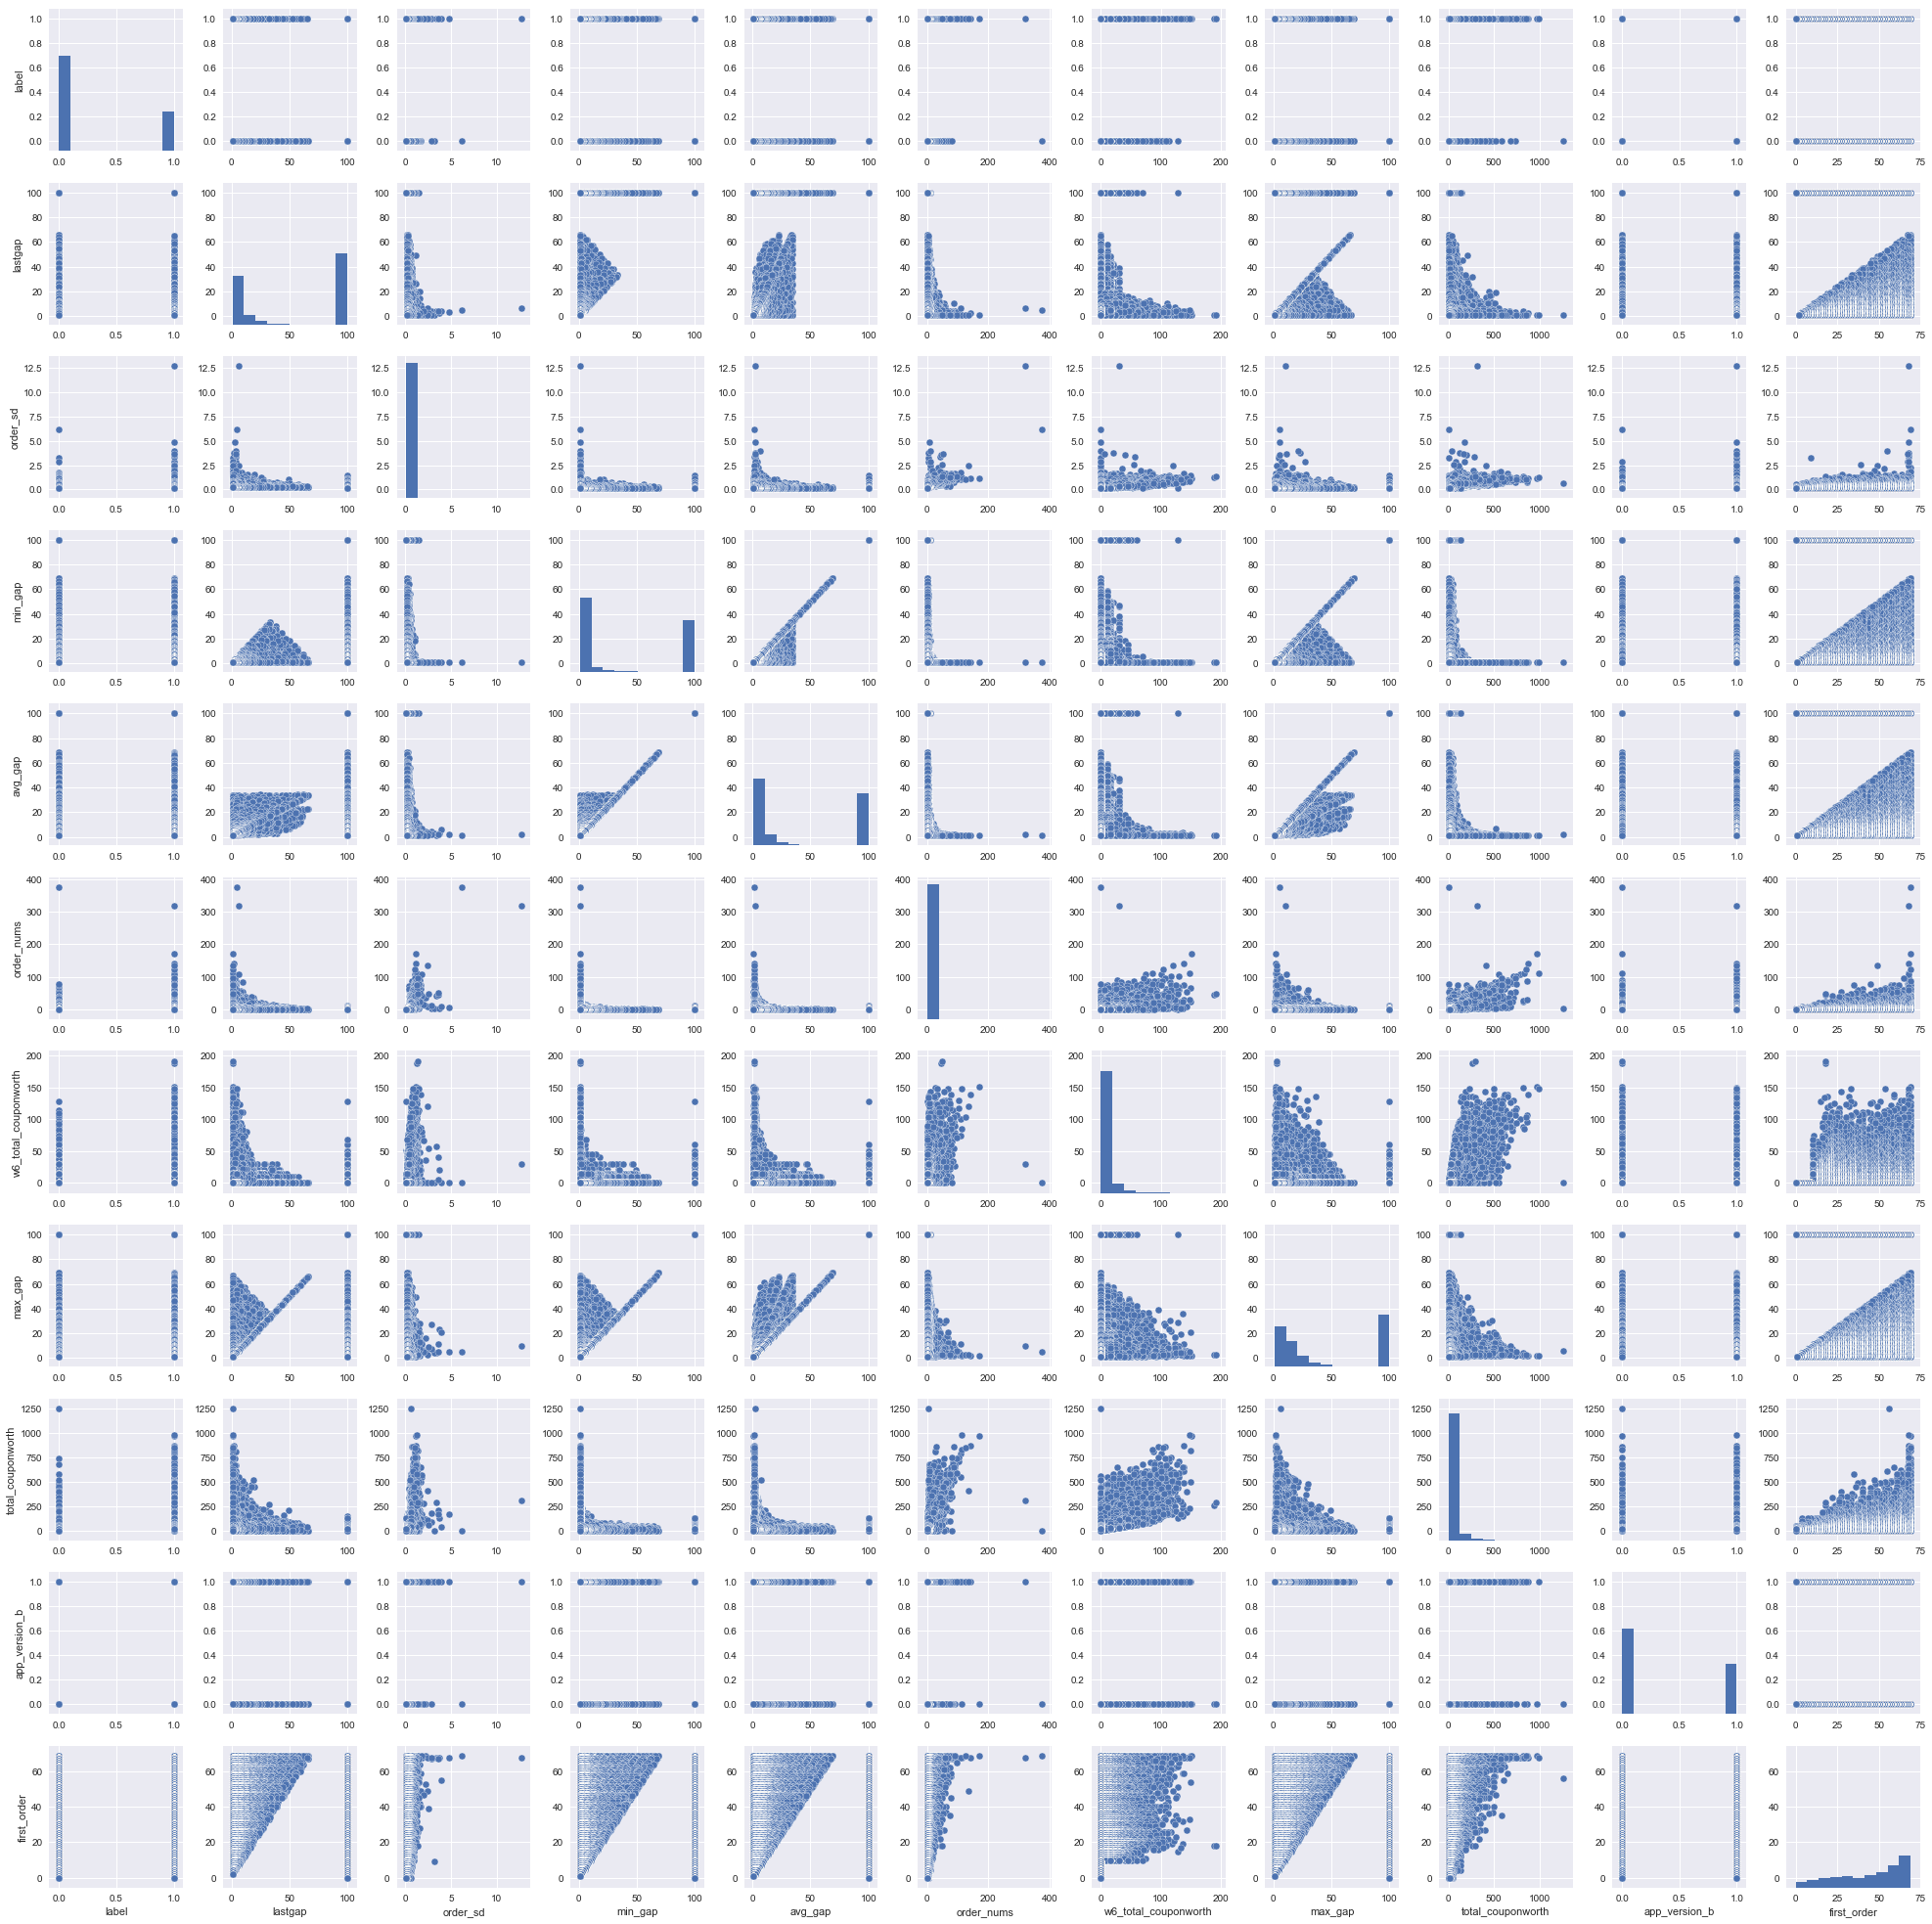

In [100]:
#'lastgap','order_sd','min_gap','avg_gap','order_nums','w6_total_couponworth','max_gap','total_couponworth','app_version_b','first_order'
sns.set()
cols = ['label','lastgap','order_sd','min_gap','avg_gap','order_nums','w6_total_couponworth','max_gap','total_couponworth','app_version_b','first_order']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

X=data.drop(['label'],axis=1)

y = data['label']

rf= RandomForestClassifier(n_estimators=1500, max_depth=10,random_state=0)
rf.fit(X,y)



KeyboardInterrupt: 

In [102]:
for name, importance in zip(X.columns, rf.feature_importances_):
    print(name, "=", importance)

order_sd = 0.04759575356074267
active_days = 0.08116523232453512
lastgap = 0.04799859551396175
avg_gap = 0.0277172514979936
min_gap = 0.03193117649507244
max_gap = 0.018757936101916006
total_orders = 0.07206397482656422
w1_total_orders = 0.0014824028629986568
w2_total_orders = 0.0017881572772133715
w3_total_orders = 0.0018935297639842148
w4_total_orders = 0.004857545410374053
w5_total_orders = 0.012975128574695653
w6_total_orders = 0.056707293030493836
w7_total_orders = 0.15073437720644897
total_couponworth = 0.01816277219296388
w1_total_couponworth = 0.0015318434325162001
w2_total_couponworth = 0.001543997749919348
w3_total_couponworth = 0.001593772541847935
w4_total_couponworth = 0.002638118444547834
w5_total_couponworth = 0.007073490457091067
w6_total_couponworth = 0.02387390647371652
w7_total_couponworth = 0.0894459796676557
first_order = 0.014680548780656291
last_order = 0.17254475516688095
accountLength = 0.008485755356234035
overall_time_mean = 0.003906798336055526
update2create

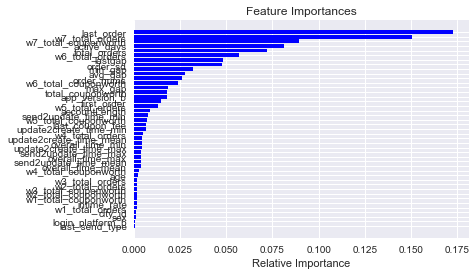

In [103]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams["figure.figsize"] = [16,20]
plt.savefig('feature_importance.png')
plt.show()

#plt.savefig('test.png', dpi=100)

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

X=data.drop(['label'],axis=1)

y = data['label']



In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)
print(metrics.classification_report(y_test,lr_predict))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87     27045
         1.0       0.73      0.60      0.66     11328

   micro avg       0.82      0.82      0.82     38373
   macro avg       0.79      0.75      0.77     38373
weighted avg       0.81      0.82      0.81     38373



0.7535170901604671


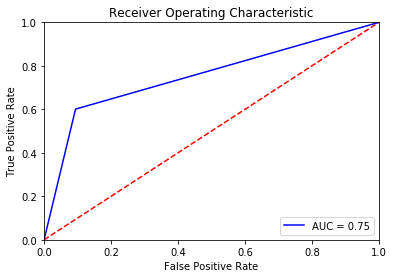

In [10]:
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_predict)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
X_train2, X_test2, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.2, random_state=42)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
lr=LogisticRegression()
lr.fit(X_train2,y_train)
lr_predict=lr.predict(X_test2)
print(metrics.classification_report(y_test,lr_predict))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88     27045
         1.0       0.75      0.60      0.66     11328

   micro avg       0.82      0.82      0.82     38373
   macro avg       0.80      0.76      0.77     38373
weighted avg       0.82      0.82      0.82     38373



0.7570672094688388


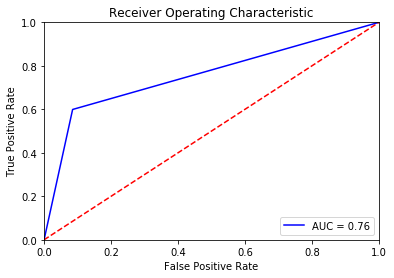

In [13]:
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_predict)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
# clf = LogisticRegression(penalty='l1', solver='saga',
#                                       tol=1e-6, max_iter=int(1e6),
#                                       warm_start=True)
clf = LogisticRegression(penalty='l1', solver='saga',
                                       tol=1e-4, max_iter=int(1e4),
                                       warm_start=False)
clf.fit(X_train2,y_train)
clf_predict=clf.predict(X_test2)
print(metrics.classification_report(y_test,clf_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88     27045
         1.0       0.75      0.60      0.66     11328

   micro avg       0.82      0.82      0.82     38373
   macro avg       0.80      0.76      0.77     38373
weighted avg       0.82      0.82      0.82     38373



0.7570600464621112


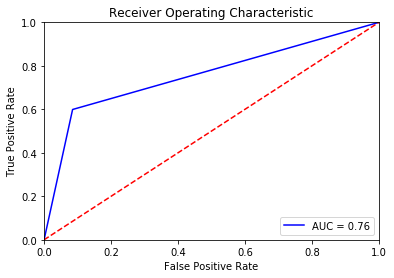

In [15]:
fpr, tpr, threshold = metrics.roc_curve(y_test, clf_predict)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
clf2 = LogisticRegression(penalty='l2', solver='saga',
                                       tol=1e-4, max_iter=int(1e4),
                                       warm_start=False)
clf2.fit(X_train2,y_train)
clf_predict2=clf2.predict(X_test2)
print(metrics.classification_report(y_test,clf_predict2))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     27045
         1.0       0.75      0.60      0.66     11328

   micro avg       0.82      0.82      0.82     38373
   macro avg       0.80      0.76      0.77     38373
weighted avg       0.82      0.82      0.82     38373



0.7571041848801902


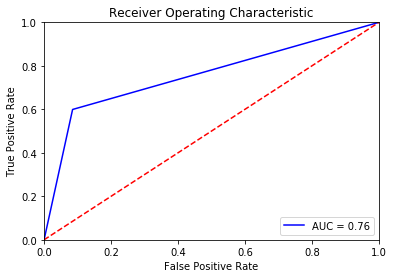

In [17]:
fpr, tpr, threshold = metrics.roc_curve(y_test, clf_predict2)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
#df_train['SalePrice'].apply(np.log)
data2=data.copy()
collist=['last_order','w7_total_orders','w7_total_couponworth','active_days','total_orders','w6_total_orders','order_sd','order_nums','w6_total_couponworth','total_couponworth','first_order']
for col in collist:
    data2[col]= np.log(1 + data2[col])
    

In [19]:
X2=data2.drop(['label'],axis=1)

y2 = data2['label']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [20]:
lr=LogisticRegression()
lr.fit(X_train3,y_train3)
lr_predict=lr.predict(X_test3)
print(metrics.classification_report(y_test3,lr_predict))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87     27045
         1.0       0.74      0.53      0.62     11328

   micro avg       0.81      0.81      0.81     38373
   macro avg       0.78      0.73      0.74     38373
weighted avg       0.80      0.81      0.80     38373



0.7257301713481298


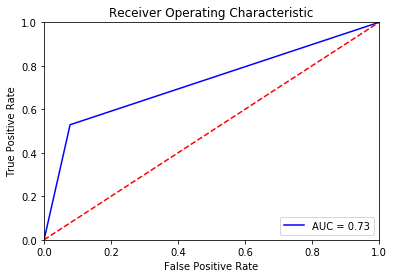

In [21]:
fpr, tpr, threshold = metrics.roc_curve(y_test3,lr_predict)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(StandardScaler().fit_transform(X2), y2, test_size=0.2, random_state=42)
#StandardScaler().fit_transform(X)
# clf = LogisticRegression(penalty='l1', solver='saga',
#                                       tol=1e-6, max_iter=int(1e6),
#                                       warm_start=True)
clf = LogisticRegression(penalty='l1', solver='saga',
                                       tol=1e-4, max_iter=int(1e4),
                                       warm_start=False)
clf.fit(X_train4,y_train4)
clf_predict=clf.predict(X_test4)
print(metrics.classification_report(y_test4,clf_predict))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     27045
         1.0       0.75      0.61      0.67     11328

   micro avg       0.82      0.82      0.82     38373
   macro avg       0.80      0.76      0.78     38373
weighted avg       0.82      0.82      0.82     38373



In [31]:
clf_predict.coef_

AttributeError: 'numpy.ndarray' object has no attribute 'coef_'

0.7629216528635575


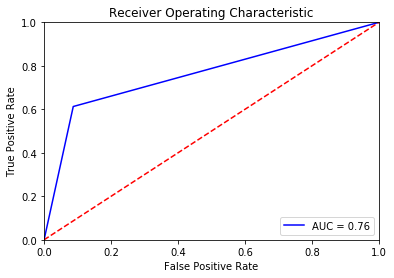

In [23]:
fpr, tpr, threshold = metrics.roc_curve(y_test4,clf_predict)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(StandardScaler().fit_transform(X2), y2, test_size=0.2, random_state=42)


C = [10000,100000,1000,100,10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c)
    clf.fit(X_train4, y_train4)
    clf_predict=clf.predict(X_test4)
    print('C:', c)
    print(metrics.classification_report(y_test4,clf_predict))
    fpr, tpr, threshold = metrics.roc_curve(y_test4, clf_predict)
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C: 10000
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     27045
         1.0       0.75      0.61      0.67     11328

   micro avg       0.82      0.82      0.82     38373
   macro avg       0.80      0.76      0.78     38373
weighted avg       0.82      0.82      0.82     38373

0.7628590267398028


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C: 100000
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     27045
         1.0       0.75      0.61      0.67     11328

   micro avg       0.82      0.82      0.82     38373
   macro avg       0.80      0.76      0.78     38373
weighted avg       0.82      0.82      0.82     38373

0.7628703514387508


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: 